# Text Mining: Models and Algorithms
## Homework 4: Be the Spindoctor!

Imagine you are a spindoctor for one of the UK parties. 

1) Develop a dictionary of "spin" that politicians have developed in their tweets, i.e. terms that politicians adopt to push specific issues or wordings that stick and influence the debate on an issue. Explain how you construct your dictionary and why this captures the idea of spin.

2) Apply your dictionary to the larger UK tweet repository - do you find the result satisfactory? Can you show an example of how your political party tried to push an agenda with different members of parliament at the same time?

3) Try to capture the effect of spin on interactions on twitter. Think about a regression framework that would allow you to control for confounders. This will be highly imperfect no matter what you do, given the time-span of the data, but try to do the best you can.



In [1]:
from hw4module import *

### Part 1 - constructing a dictionary 

We decided to look at tweets from the UK Labour Party to construct our dictionary. The party was led into the election by far-left politician Jeremy Corbyn and Brexit was a key election issue.  

The corpus of tweets is over a relatively small window of time, so constructing a dictionary of political spin will be highly context specific. The dictionary we have extracted from the corpus is based on the 'vomit principle', where politicians repeat a term often enough for it to become part of the public discourse. In practice, this means extracting short-phrases repeated frequently by labour politicians and using those to identify tweets that are likely to be related to spin. As we will see below, this successfully identifies some topics at the time that could be viewed as 'scandals' that the Labour party used to try and damage the Conservative party.

Given the relatively limited number of tools we have developed so far and the complexity of identifying political spin without some sort of labelled dataset, this is an appropriate approximation for our dictionary. We also toyed with the idea of using the hashtags to identify tweets likely to contain political spin (hashtags are likely to contain short catch-phrases that embody spin tactics). However, the coverage of hashtags among the tweets was too small to make this worthwhile.

https://theconversation.com/the-vomit-principle-the-dead-bat-the-freeze-how-political-spin-doctors-tactics-aim-to-shape-the-news-106453

First, we clean up the text body of the tweets, which included removing user mentions and emojis. We then vectorize the data, extracting ngrams of length 4. This was a hyperparameter that we tuned, and lengths 4-6 identified similar events that could be characterised as spin in our corpus. We then took the 100 most common ngrams of length 4 as our spin dictionary. The dictionary appears as a list below: 

[it might be nice to collapse the dictionary so we have one representation of each issue identified]

### Part 2 - apply dictionary to corpus

We extracted tweets where words in the spin dictionary match the body of the tweet.

The example relates to a scandal where a pohot emerged of a four year old boy with pneumonia being forced to lie on the floor of a Leeds hospital for hours while waiting to be attended by doctors. The Labour party used this incident to attack Tories on the quality of the NHS. The issue is a good example of political spin because it was alleged that the photo displaying the boy was faked.

The example below relate to the 'Theresa May's botched Brexit deal', which is a clear example of alliterative spin.

### Part 3 - Effect of spin on interactions on twitter

With the label of the tweet as a spin tweet or not, we built a regression model in which we want to measure the level of association between the inclusion of spin content ($Spin_i == 1$) (under different type of spin content) in the tweet and the amount of interactions the tweet creates. To measure the number of interactions we focus on the likes which is the most frequent interaction from the users , but we also checked the amount of likes, quotes and replies to the tweets.

On the regressions we ran we included the number of hashtags of the tweet ($Hashtags_i$), the length of the tweet ($Length_i$), the number of followers ($Followers_i$) of the politician, and the hour of the day ($Hour_i$)as well as the day of the week ($Day_i$) the tweet was posted, as our control variables.

Our regression model is expressed as:

$$ln(interaction_{Ci}) = \beta_0 + \beta_1 Spin_{Pi} + \beta_2 Hashtags_i + \beta_3 Length_i + \beta_4 Followers_i + \beta_5 Hour_i + \beta_6 Day_i$$


In the set of interaction $C$ types we have:
- Likes
- Retweets
- Quotes
- Replys

IN the set of type of spin content $P$ we use:
- matching a spin word
- media attachment

Since most popular politicians tend to have a higher number of interactions, we can face correlations problems within the clusters (politicians), for this reason and after checking the reasiduals of a normal OLS, we decide to use an cluster robust OLS model in which our group or cluster is the politician username.

#### Matching at least one spin world

When we tag the tweets as spin tweet or not according with our dictionary of 136 words, we get a total of 16.763 tweets (41%) labeled as spin. This classification of the tweets do shows a good correlation with the number of reactions to the tweets as is shown in the next plot.

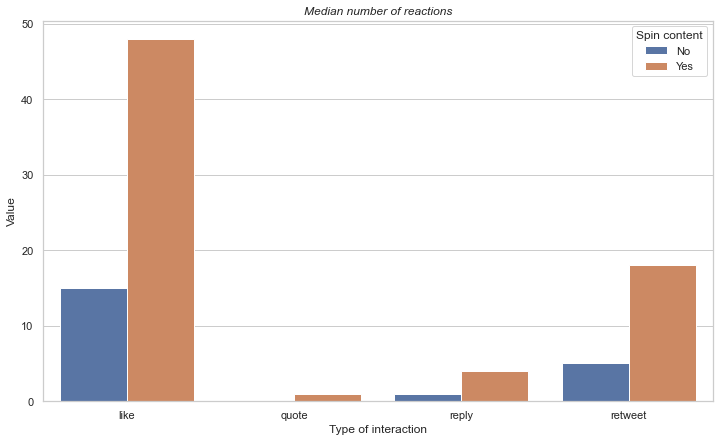

In [2]:
metrics_plot(uk_data_spin, 'dictionary_spin')

In [3]:
controls = ['hashtags_counts', 'tweet_length', 'author.public_metrics.followers_count', 'created_at_week_day', 'created_at_hour']

In [4]:
results_11 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.like_count', ['dictionary_spin'], controls, 'author.username')

Robust cluster OLS over 31287 observations using public_metrics.like_count as target. On average the interactions increased 34.75% (p-value = 0.0). R2 = 0.101


In [5]:
results_12 =run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.quote_count', ['dictionary_spin'], controls, 'author.username')

Robust cluster OLS over 21002 observations using public_metrics.quote_count as target. On average the interactions increased 33.85% (p-value = 0.0). R2 = 0.048


In [6]:
results_13 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.reply_count', ['dictionary_spin'], controls, 'author.username')

Robust cluster OLS over 28654 observations using public_metrics.reply_count as target. On average the interactions increased 48.4% (p-value = 0.0). R2 = 0.067


In [7]:
results_14 =run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.retweet_count', ['dictionary_spin'], controls, 'author.username')

Robust cluster OLS over 29873 observations using public_metrics.retweet_count as target. On average the interactions increased 44.84% (p-value = 0.0). R2 = 0.084


#### Spin tweet from the media attachment

On the other hand, by tagging the tweet as spin according to whether or not it has media attached, we classified 7538 (18%) as spin tweets. Here the reactiond are still correlated with the classification of the tweet as a spin one.

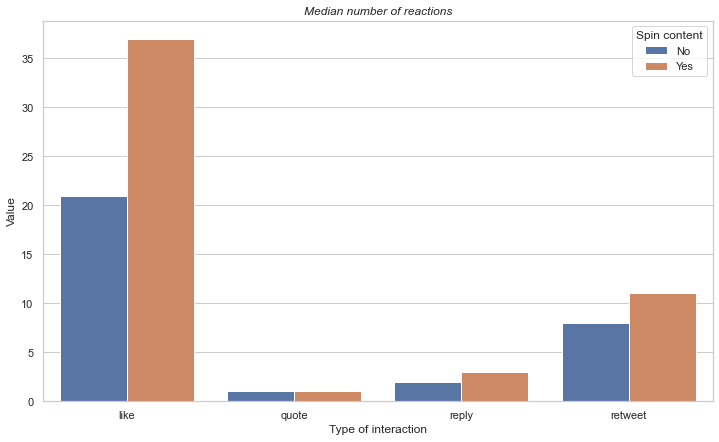

In [8]:
metrics_plot(uk_data_spin, 'media_spin')

In [9]:
results_21 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.like_count', ['media_spin'], controls, 'author.username')

Robust cluster OLS over 31287 observations using public_metrics.like_count as target. On average the interactions increased 48.85% (p-value = 0.0). R2 = 0.105


In [10]:
results_22 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.quote_count', ['media_spin'], controls, 'author.username')

Robust cluster OLS over 21002 observations using public_metrics.quote_count as target. On average the interactions increased -9.13% (p-value = 0.159). R2 = 0.042


In [11]:
results_23 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.reply_count', ['media_spin'], controls, 'author.username')

Robust cluster OLS over 28654 observations using public_metrics.reply_count as target. On average the interactions increased 18.96% (p-value = 0.003). R2 = 0.056


In [12]:
results_23 = run_cluster_Robust_OLS(uk_data_spin, 'public_metrics.retweet_count', ['media_spin'], controls, 'author.username')

Robust cluster OLS over 29873 observations using public_metrics.retweet_count as target. On average the interactions increased -4.45% (p-value = 0.422). R2 = 0.073
